# Alternativas à acurácia: curva ROC


In [32]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import make_normal_data, pdfnormal

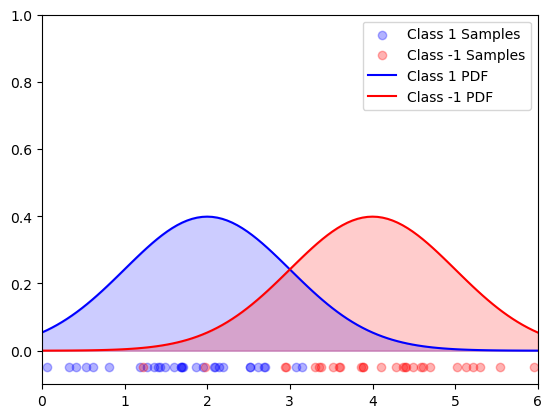

In [33]:
s1 = 1
s2 = 1
N1 = 30
N2 = 30
c1 = [2]
c2 = [4]

x1, y1 = make_normal_data(s = s1, n = N1, c = np.array(c1), dim = 1, label = 1)
x2, y2 = make_normal_data(s = s2, n = N2, c = np.array(c2), dim = 1, label = -1)

grid = np.linspace(0, 6, 100)
normal1 = pdfnormal(grid, m = 2, s = s1)
normal2 = pdfnormal(grid, m = 4, s = s2)

plt.scatter(x1, np.zeros(len(x1)) - 0.05, c = 'blue', label = 'Class 1 Samples', alpha= 0.3)
plt.scatter(x2, np.zeros(len(x2)) - 0.05, c = 'red', label = 'Class -1 Samples', alpha= 0.3)
plt.plot(grid, normal1, label = 'Class 1 PDF', color = 'blue')
plt.plot(grid, normal2, label = 'Class -1 PDF', color = 'red')
plt.fill_between(grid, normal1, color='blue', alpha=0.2)
plt.fill_between(grid, normal2, color='red', alpha=0.2)
plt.xlim(0, 6)
plt.ylim(-0.1, 1)
plt.legend()

# Variando o limiar

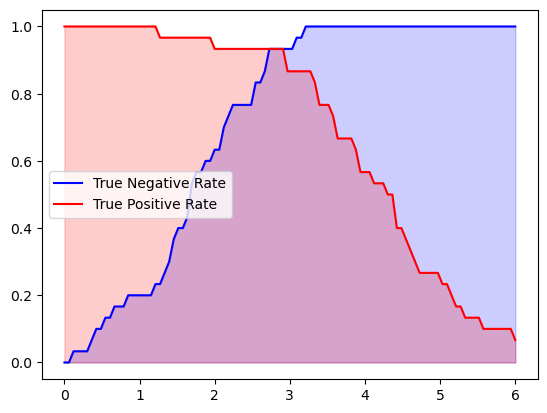

In [34]:
xseq = np.linspace(0, 6, 100)
true_negative = np.zeros(len(xseq))
true_positive = np.zeros(len(xseq))
for i in range(len(xseq)):
    true_negative[i] = sum(1 for x in x1 if x < xseq[i])/N1
    true_positive[i] = sum(1 for x in x2 if x > xseq[i])/N2
    
plt.plot(xseq, true_negative, label = 'True Negative Rate', color = 'blue')
plt.plot(xseq, true_positive, label = 'True Positive Rate', color = 'red')
plt.fill_between(xseq, true_negative, color='blue', alpha=0.2)
plt.fill_between(xseq, true_positive, color='red', alpha=0.2)
plt.legend()

# Curva ROC

(0.0, 1.0)

(0.0, 1.0)

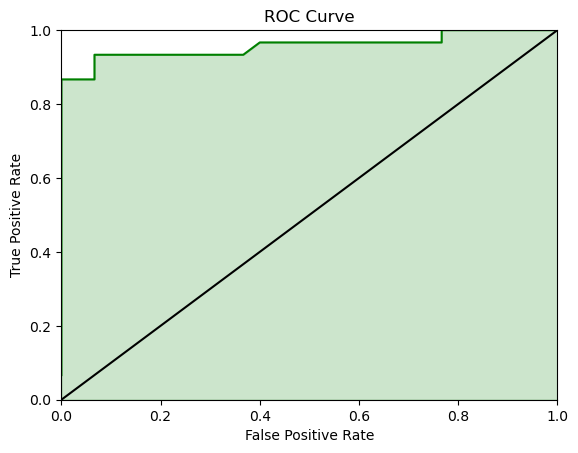

In [42]:
plt.plot((1-true_negative), true_positive, label = 'ROC Curve', color = 'green')
plt.plot(xseq, xseq, color = 'black')
plt.fill_between((1-true_negative), true_positive, color='green', alpha=0.2)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim(0, 1)
plt.ylim(0, 1)